In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mh_sampler(x0, lnprob_fn, prop_fn, prop_fn_kwargs={}, iterations=100000):
    
    ndim = len(x0)
    
    chain = np.zeros((iterations, ndim))
    lnprob = np.zeros(iterations)
    accept_rate = np.zeros(iterations)
    
    chain[0] = x0
    lnprob0 = lnprob_fn(x0)
    lnprob[0] = lnprob0
    
    naccept = 0
    for ii in range(1, iterations):
        x_star, factor = prop_fn(x0, **prop_fn_kwargs)
        u = np.random.uniform(0, 1)
        lnprob_star = lnprob_fn(x_star)
        H = np.exp(lnprob_star - lnprob0) * factor
        
        if u < H:
            x0 = x_star
            lnprob0 = lnprob_star
            naccept += 1
        
        chain[ii] = x0
        lnprob[ii] = lnprob0
        accept_rate[ii] = naccept / ii
    
    return chain, accept_rate, lnprob

In [3]:
def gaussian_proposal(x, sigma=0.1):
    x_star = x + np.random.randn(len(x)) * sigma
    qxx = 1
    
    return x_star, qxx

In [4]:
def simple_gaussian_lnpost(x):
    mu = 0
    std = 1

    if x < 10 and x > -10:
        return -0.5 * (x-mu)**2 / std**2
    else:
        return -1e6

In [5]:
x0 = np.array([-2])
sigma = 2.38
chain, accept_rate, lnprob = mh_sampler(x0, simple_gaussian_lnpost,
                                        gaussian_proposal, prop_fn_kwargs={'sigma':sigma})

(array([3.000e+00, 1.000e+00, 7.000e+00, 9.000e+00, 1.000e+01, 6.000e+00,
        2.700e+01, 3.700e+01, 6.300e+01, 1.280e+02, 1.970e+02, 2.900e+02,
        4.450e+02, 6.550e+02, 9.540e+02, 1.324e+03, 1.740e+03, 2.197e+03,
        2.952e+03, 3.341e+03, 3.980e+03, 4.596e+03, 5.356e+03, 5.846e+03,
        6.431e+03, 6.974e+03, 6.496e+03, 6.495e+03, 6.338e+03, 5.719e+03,
        5.313e+03, 4.649e+03, 3.976e+03, 3.302e+03, 2.794e+03, 2.062e+03,
        1.625e+03, 1.194e+03, 8.340e+02, 5.550e+02, 3.810e+02, 2.760e+02,
        1.570e+02, 1.350e+02, 6.100e+01, 3.300e+01, 1.700e+01, 5.000e+00,
        8.000e+00, 6.000e+00]),
 array([-4.45623594, -4.28744665, -4.11865735, -3.94986806, -3.78107876,
        -3.61228947, -3.44350017, -3.27471088, -3.10592159, -2.93713229,
        -2.768343  , -2.5995537 , -2.43076441, -2.26197512, -2.09318582,
        -1.92439653, -1.75560723, -1.58681794, -1.41802864, -1.24923935,
        -1.08045006, -0.91166076, -0.74287147, -0.57408217, -0.40529288,
        -0.

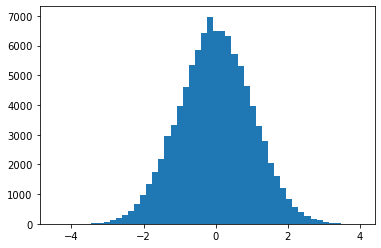

In [6]:
plt.hist(chain, 50)

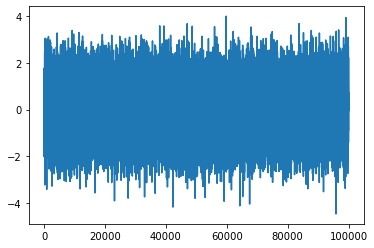

In [7]:
plt.plot(chain)

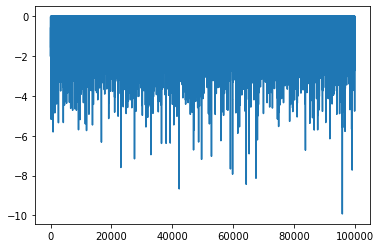

In [8]:
plt.plot(lnprob)

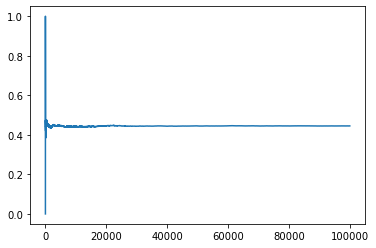

In [9]:
plt.plot(accept_rate)

In [12]:
class multi_gaussian_lnpost:
    
    def __init__(self, ndim=10, seed=12345):
        
        np.random.seed(seed)
        self.var = 10**(np.random.randn(ndim)*1.5)
        self.mu = scipy.stats.norm(loc=0, scale=10).rvs(ndim)

    def __call__(self, x):
        
        if np.all(x < 500) and np.all(x > -500):
            return scipy.stats.multivariate_normal(mean=self.mu, cov=self.var).logpdf(x)
        
        return -1e6

In [11]:
x0 = np.random.randn(10)
sigma = 0.8
chain, ar, lnprob = mh_sampler(x0, multi_gaussian_lnpost(), gaussian_proposal, 
                               prop_fn_kwargs={'sigma':sigma}, iterations=100000)